In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%load_ext autoreload
%autoreload 2
import utils
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

LEYENDO ARCHIVO ACCIDENTES VIALES CABA

In [162]:
df_homicidios = pd.read_excel('homicidios.xlsx')
df_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


CONOCIENDO DATAFRAME

In [163]:
verificar_tipo_datos(df_homicidios)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,ID,[<class 'str'>],100.00,0.00,0
1,N_VICTIMAS,[<class 'int'>],100.00,0.00,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
3,AAAA,[<class 'int'>],100.00,0.00,0
4,MM,[<class 'int'>],100.00,0.00,0
5,DD,[<class 'int'>],100.00,0.00,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00,0
7,HH,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
8,LUGAR_DEL_HECHO,[<class 'str'>],100.00,0.00,0
9,TIPO_DE_CALLE,[<class 'str'>],100.00,0.00,0


CONOCIENDO TIPO DE DATOS

In [164]:
df_homicidios.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

TRANSFORMANDO PARA APLICAR EN DASHBOARD, CADA PASO REALIZADO ES EN PRO DE UNA PRESENTACION EXITOSA DEL EDA

In [165]:
df_homicidios['HORA'] = pd.to_datetime(df_homicidios['HORA'], format='%H:%M:%S', errors='coerce')
df_homicidios


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,1900-01-01 07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,1900-01-01 00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,1900-01-01 05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,1900-01-01 17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1900-01-01 01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,1900-01-01 00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,1900-01-01 10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [166]:
df_homicidios.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                     datetime64[ns]
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

A LAS COLUMNAS pos x Y pos y LES APLICO TRANSFORMACION TIPO DE DATO PARA CONVERTIR EN FLOAT

In [167]:
df_homicidios['pos x'] = pd.to_numeric(df_homicidios['pos x'], errors='coerce')
df_homicidios['pos y'] = pd.to_numeric(df_homicidios['pos y'], errors='coerce')


In [168]:
df_homicidios.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                     datetime64[ns]
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                           float64
pos y                           float64
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

SE ELIMINA LA COLUMNA ALTURA CON 567 NULOS

In [169]:
df_homicidios = df_homicidios.drop('Altura', axis=1)


In [170]:
df_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS


APLICANDO SI Y NO A LA COLUMNA CRUCE, DETERMINA SI EXISTIA UN CRUCE EN EL LUGAR DEL HECHO

In [171]:
columna_a_transformar = 'Cruce'

def transformar_cruce(valor):
    if pd.isna(valor):
        return 'NO'  # Si el valor es NaN, coloca 'NO'
    else:
        return 'SI'  # Si el valor no es NaN, coloca 'SI'


df_homicidios[columna_a_transformar] = df_homicidios[columna_a_transformar].apply(transformar_cruce)

In [172]:
df_homicidios.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1900-01-01 01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS


ENCONTRANDO NULOS

In [173]:
df_homicidios.isnull().sum()

ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      1
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     1
Cruce                     0
Dirección Normalizada     8
COMUNA                    0
XY (CABA)                 0
pos x                    12
pos y                    12
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dtype: int64

In [174]:
df_homicidios[df_homicidios['HORA'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,NaT,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO


In [175]:
df_homicidios[df_homicidios['pos x'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,1900-01-01 20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,13,Point (. .),NaN,NaN,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,1900-01-01 00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,NaN,4,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,NaN,NO,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,1900-01-01 00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,1900-01-01 09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,1900-01-01 11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,NaN,9,Point (. .),NaN,NaN,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,1900-01-01 03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,NaN,7,Point (. .),NaN,NaN,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,1900-01-01 23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),NaN,NaN,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,1900-01-01 22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,14,Point (. .),NaN,NaN,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,1900-01-01 06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,NaN,14,Point (. .),NaN,NaN,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


In [176]:
df_homicidios[df_homicidios['Calle'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,1900-01-01 20:35:00,20,SD,CALLE,NaN,NO,NaN,0,Point (. .),NaN,NaN,PEATON-SD,PEATON,SD


CONCLUSION NO SE ELIMINAN NULOS TODOS LOS DATOS EN LAS COLUMNAS SON UTILES

BUSCANDO DUPLICADOS

In [177]:
df_homicidios[df_homicidios.duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


SE EXPORTA A CSV 

In [178]:
df_homicidios.to_csv('homicidios.csv', index = False)

In [2]:
df_homicidios = pd.read_csv('homicidios.csv')
df_homicidios.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO


ANALIZANDO

In [3]:
df_homicidios.describe()

,N_VICTIMAS,AAAA,MM,DD,COMUNA,pos x,pos y
count,696.000000,696.000000,696.000000,696.000000,696.000000,684.000000,684.000000
mean,1.030172,2018.188218,6.692529,15.936782,7.425287,-58.441545,-34.619632
std,0.179393,1.683754,3.571309,8.639646,4.387050,0.046144,0.035289
min,1.000000,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017.000000,4.000000,9.000000,4.000000,-58.476218,-34.643689
50%,1.000000,2018.000000,7.000000,16.000000,8.000000,-58.444513,-34.622928
75%,1.000000,2020.000000,10.000000,23.000000,11.000000,-58.401841,-34.596799
max,3.000000,2021.000000,12.000000,31.000000,15.000000,-58.356082,-34.534654


VICTIMAS POR AÑO

In [4]:
df_homicidios.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97


VICTIMAS POR SEMESTRE DE CADA AÑO

In [6]:

def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2


df_homicidios['Semestre'] = df_homicidios['MM'].apply(determinar_semestre)

In [84]:
df_homicidios.groupby(['AAAA', 'Semestre'])['N_VICTIMAS'].sum().reset_index()

,AAAA,Semestre,N_VICTIMAS
0,2016,1,65
1,2016,2,81
2,2017,1,69
3,2017,2,71
4,2018,1,70
5,2018,2,79
6,2019,1,57
7,2019,2,47
8,2020,1,31
9,2020,2,50


In [5]:
df_homicidios.head(1)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,geometry
0,2016-0001,1,2016-01-01,2016,1,1,1900-01-01 04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,NaN


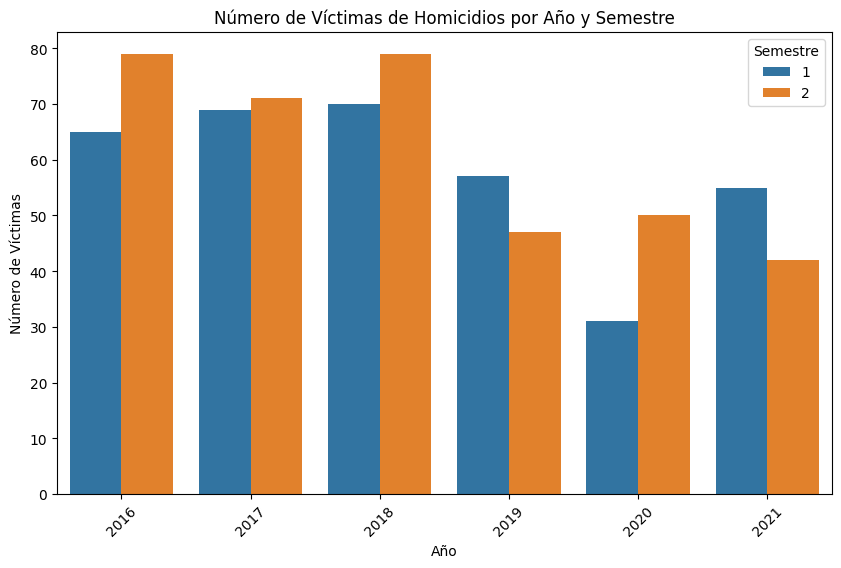

In [7]:
df_agregado = df_homicidios.groupby(['AAAA', 'Semestre'])['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_agregado, x='AAAA', y='N_VICTIMAS', hue='Semestre')
plt.title('Número de Víctimas de Homicidios por Año y Semestre')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.legend(title='Semestre')
plt.show()

KPI 1:

EL SEGUNDO SEMESTRE DEL AÑO 2021 CUMPLE CON LA REDUCCION DEL 10%. SE ESPERABA UNA TASA DE HOMICIDIOS DE ACCIDENTES VIALES IGUAL A 1.49% (EL PRIMER SEMESTRE DE ESE AÑO FUE DE 1.65) Y SE OBTUVO UNA TASA DE 1.26. 

DEFINICION DE ESTE KPI VER README

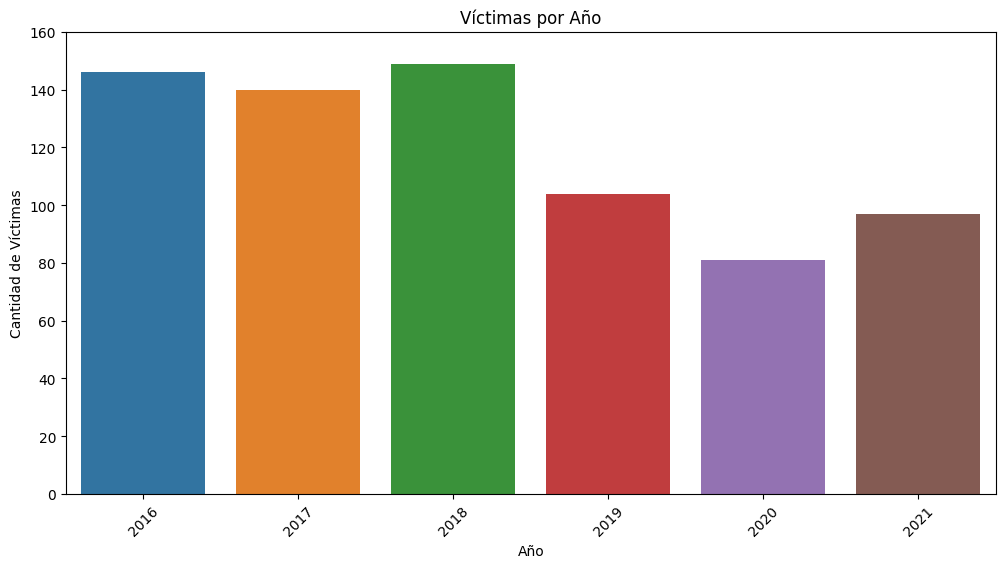

In [114]:
suma_victimas_por_año = df_homicidios.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_año, x='AAAA', y='N_VICTIMAS')
plt.title('Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)
plt.ylim(0, 160)
plt.show()

EL PEOR DE LOS MESES

In [8]:
agrupado_por_anio_mes = df_homicidios.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()
for year in agrupado_por_anio_mes['AAAA'].unique():
    df_year = agrupado_por_anio_mes[agrupado_por_anio_mes['AAAA'] == year]
    max_month = df_year.loc[df_year['N_VICTIMAS'].idxmax()]['MM']
    max_victims = df_year['N_VICTIMAS'].max()
    print(f"Año {year}: El mes con más siniestros ({max_victims} víctimas) fue el mes {max_month}")

Año 2016: El mes con más siniestros (19 víctimas) fue el mes 12
Año 2017: El mes con más siniestros (18 víctimas) fue el mes 5
Año 2018: El mes con más siniestros (16 víctimas) fue el mes 8
Año 2019: El mes con más siniestros (14 víctimas) fue el mes 8
Año 2020: El mes con más siniestros (22 víctimas) fue el mes 12
Año 2021: El mes con más siniestros (13 víctimas) fue el mes 1


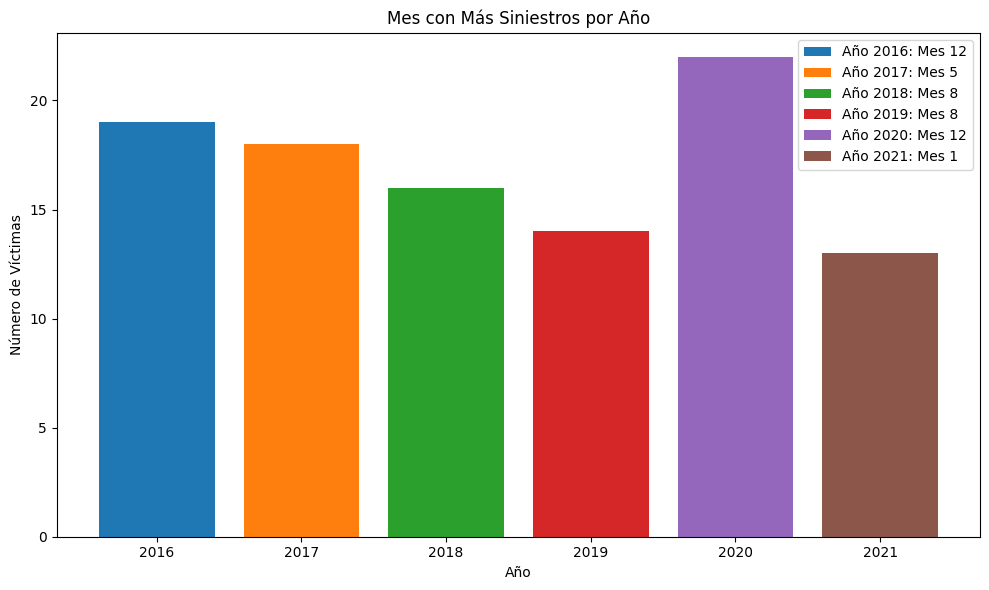

In [10]:
agrupado_por_anio_mes = df_homicidios.groupby(['AAAA', 'MM'])['N_VICTIMAS'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
for year in agrupado_por_anio_mes['AAAA'].unique():
    df_year = agrupado_por_anio_mes[agrupado_por_anio_mes['AAAA'] == year]
    max_month = df_year.loc[df_year['N_VICTIMAS'].idxmax()]['MM']
    max_victims = df_year['N_VICTIMAS'].max()
    ax.bar(str(year), max_victims, label=f'Año {year}: Mes {max_month}')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')
ax.set_title('Mes con Más Siniestros por Año')
ax.legend()
plt.tight_layout()
plt.show()


ME PERMITO CONCLUIR QUE LOS SINIESTROS SON UN CONJUNTO DE DATOS MUY DISTRIBUIDOS A LO LARGO DEL TIEMPO Y NO EXISTE UN MES O AÑO QUE LLAME LA ATENCION POR UNA FUERTE SUBIDA EN LA CANTIDAD DE VICTIMAS FATALES

LAS COMUNAS Y SUS VICTIMAS

In [85]:
df_homicidios.groupby(['COMUNA'])['N_VICTIMAS'].sum().reset_index()

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


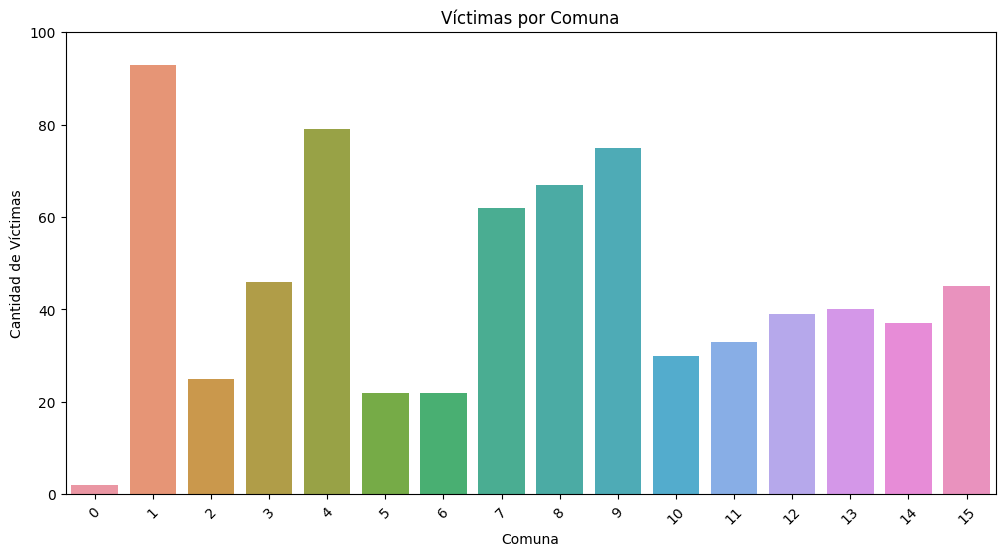

In [112]:
suma_victimas_por_comuna = df_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_comuna, x='COMUNA', y='N_VICTIMAS')
plt.title('Víctimas por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

LA COMUNA 1 ES LA MAS PELIGROSA DE LA CABA, HAY QUE ENTENDER EL PORQUE

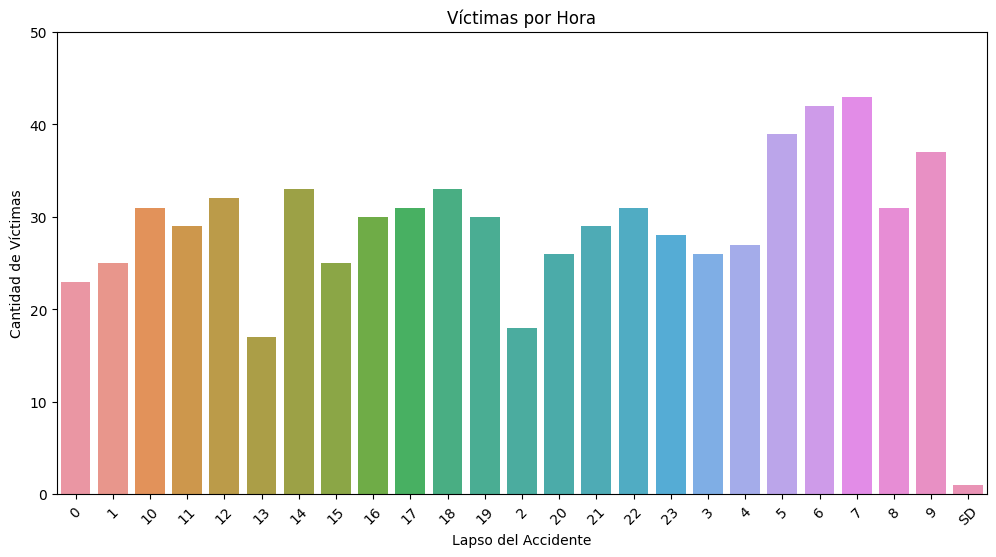

In [115]:
suma_victimas_por_hora = df_homicidios.groupby('HH')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=suma_victimas_por_hora, x='HH', y='N_VICTIMAS')
plt.title('Víctimas por Hora')
plt.xlabel('Lapso del Accidente')
plt.ylabel('Cantidad de Víctimas')
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.show()

EN EL LAPSO DE 6 A 7 DE LA MAÑANA ES CUANDO OCURREN MAS ACCIDENTES

EL ACUSADO Y SU VICTIMA

<Figure size 1200x600 with 0 Axes>

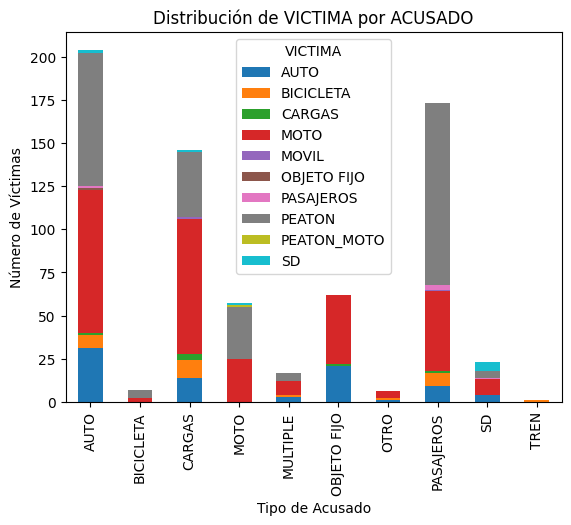

In [127]:
pivot_table = df_homicidios.pivot_table(index='ACUSADO', columns='VICTIMA', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribución de VICTIMA por ACUSADO')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Número de Víctimas')
plt.show()

EN DEFINITIVA EL AGENTE VIAL IGUAL A MOTO ES EL MAS AFECTADO INDIFERENTE DEL TIPO DE ACUSADO

VICTIMAS POR TIPO DE CALLE, ¿DONDE SE ACCIDENTAN MAS?

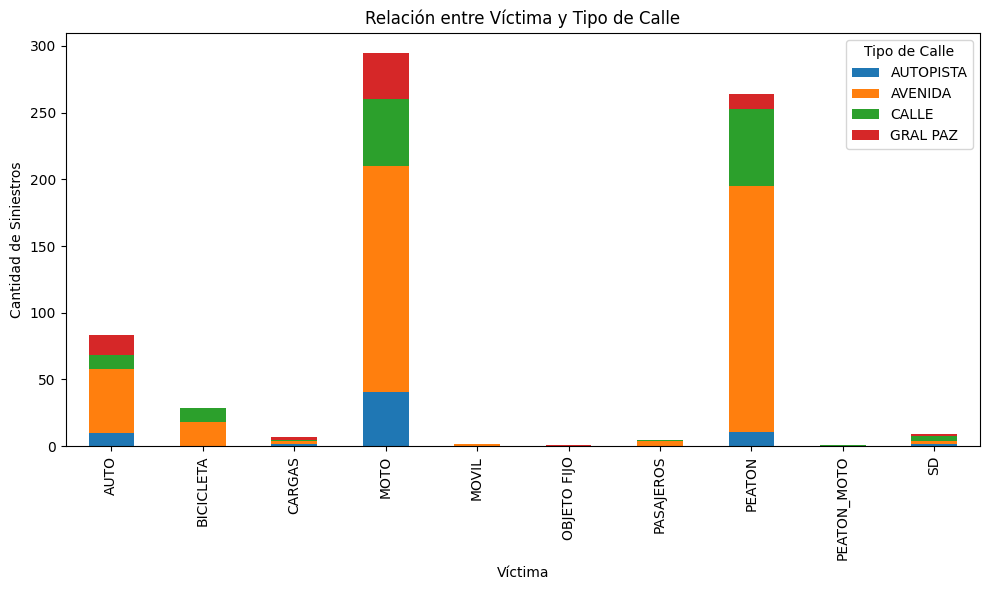

In [12]:
contingency_table = pd.crosstab(df_homicidios['VICTIMA'], df_homicidios['TIPO_DE_CALLE'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Siniestros')
plt.title('Relación entre Víctima y Tipo de Calle')
plt.tight_layout()
plt.legend(title='Tipo de Calle')
plt.show()

LAS AVENIDAS SON PELIGROSAS PARA LOS AGENTES VIALES PEATON Y MOTO, SON DE POR LO MENOS 13 METROS DE ANCHO, POSIBLEMENTE EL PEATON NO USA PUENTES, AL SER TAN AMPLIAS PUEDEN PRESENTARSE POR PARTE DE LOS AUTOS CAMBIOS DE CARRIL SIN DIRECCIONALES PERJUDICANDO A LAS MOTOS, EL EXCESO DE VELOCIDAD ES UN FACTOR DETERMINANTE

LA CALLE MAS PELIGROSA

In [76]:
mas_peligrosa = df_homicidios['Calle'].value_counts()
mas_peligrosa

Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64

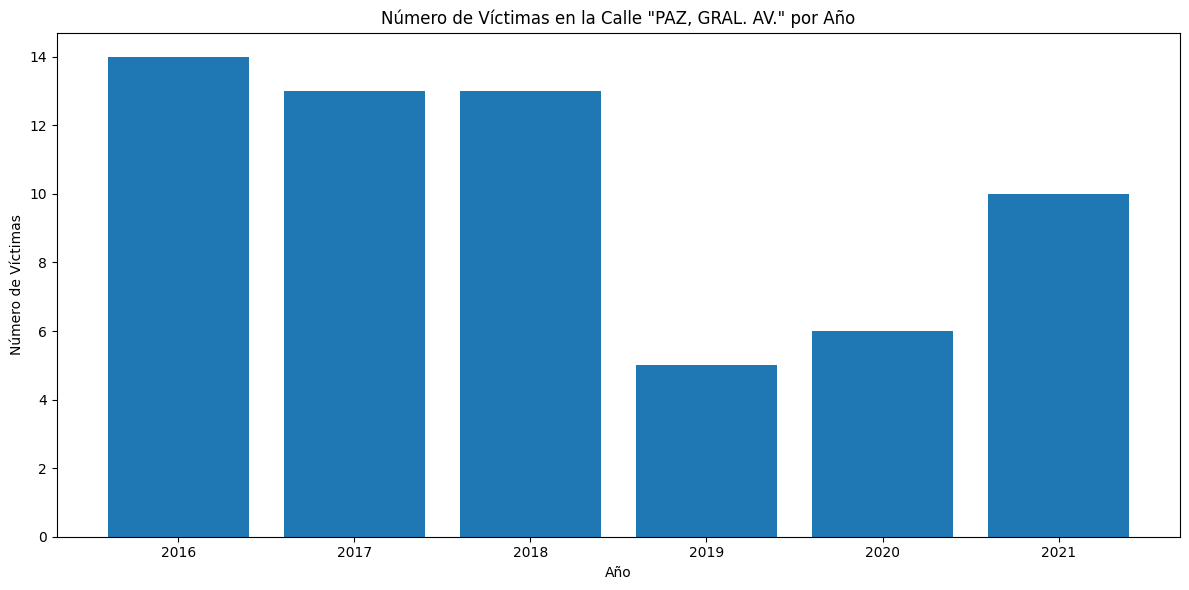

In [78]:
df_filtrado = df_homicidios[df_homicidios['Calle'] == 'PAZ, GRAL. AV.']
grupo_anio = df_filtrado.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(grupo_anio['AAAA'], grupo_anio['N_VICTIMAS'])
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas en la Calle "PAZ, GRAL. AV." por Año')
plt.tight_layout()
plt.show()


¿LA COMUNA MAS PELIGROSA?

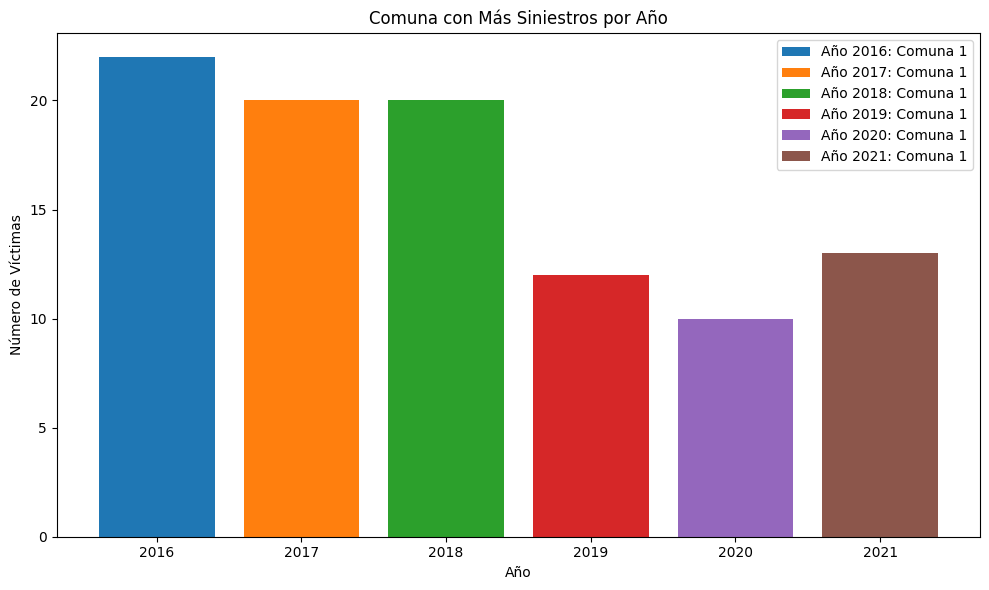

In [13]:
agrupado_por_anio_comuna = df_homicidios.groupby(['AAAA', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
for year in agrupado_por_anio_comuna['AAAA'].unique():
    df_year_new = agrupado_por_anio_comuna[agrupado_por_anio_comuna['AAAA'] == year]
    max_comuna = df_year_new.loc[df_year_new['N_VICTIMAS'].idxmax()]['COMUNA']
    max_victims = df_year_new['N_VICTIMAS'].max()
    ax.bar(str(year), max_victims, label=f'Año {year}: Comuna {max_month}')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')
ax.set_title('Comuna con Más Siniestros por Año')
ax.legend()
plt.tight_layout()
plt.show()

LA COMUNA 1 ES LA MAS PELIGROSA DE TODOS LOS AÑOS

DISTRIBUCION DE TIPOS DE CALLE POR COMUNAS

<Figure size 1200x600 with 0 Axes>

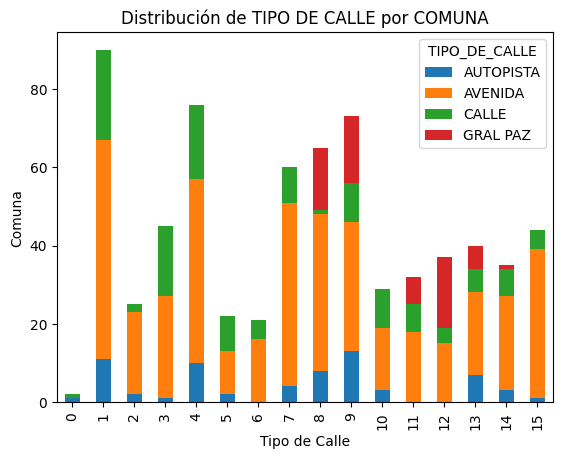

In [16]:
pivot_table_3 = df_homicidios.pivot_table(index='COMUNA', columns='TIPO_DE_CALLE', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
pivot_table_3.plot(kind='bar', stacked=True)
plt.title('Distribución de TIPO DE CALLE por COMUNA')
plt.xlabel('Tipo de Calle')
plt.ylabel('Comuna')
plt.show()

LA COMUNA 1 ES LA DE MAYOR CANTIDAD DE AVENIDAS, ESA ES UNA DE LAS RAZONES DE SER LA MAS PELIGROSA

In [70]:
filtro = (df_homicidios['TIPO_DE_CALLE'] == 'AVENIDA') & (df_homicidios['COMUNA'] == 1)
df_filtrado = df_homicidios[filtro]

# Paso 2: Contar la frecuencia de cada calle
frecuencia_calles = df_filtrado['Calle'].value_counts()

# Paso 3: Encontrar la calle más peligrosa (la que más se repite)
calle_mas_peligrosa = frecuencia_calles.idxmax()
frecuencia_maxima = frecuencia_calles.max()

# Muestra la calle más peligrosa y su frecuencia
print(f'Calle más peligrosa en Comuna 1: {calle_mas_peligrosa} (Frecuencia: {frecuencia_maxima})')

Calle más peligrosa en Comuna 1: 9 DE JULIO AV. (Frecuencia: 5)


SE ELIMINA LA COMUNA CERO POR SER INEXISTENTE SEGUN FUENTES DE LA CIUDAD

In [17]:
df_homicidios.drop(df_homicidios[df_homicidios['COMUNA'] == 0].index, inplace=True)

In [18]:
df_homicidios.to_csv('homicidios.csv', index = False)

In [19]:
df_homicidios = pd.read_csv('homicidios.csv')
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     694 non-null    object 
 1   N_VICTIMAS             694 non-null    int64  
 2   FECHA                  694 non-null    object 
 3   AAAA                   694 non-null    int64  
 4   MM                     694 non-null    int64  
 5   DD                     694 non-null    int64  
 6   HORA                   693 non-null    object 
 7   HH                     694 non-null    object 
 8   LUGAR_DEL_HECHO        694 non-null    object 
 9   TIPO_DE_CALLE          694 non-null    object 
 10  Calle                  694 non-null    object 
 11  Cruce                  694 non-null    object 
 12  Dirección Normalizada  687 non-null    object 
 13  COMUNA                 694 non-null    int64  
 14  XY (CABA)              694 non-null    object 
 15  pos x 

CON GEOPANDAS!!

In [73]:
def convert_to_geometry(coord):
    try:
        geometry = loads(coord)
        return geometry
    except Exception as e:
        return None

df_homicidios['geometry'] = df_homicidios['XY (CABA)'].apply(convert_to_geometry)

gdf = gpd.GeoDataFrame(df_homicidios, geometry='geometry')

CON EL DATAFRAME GDF SE GRAFICA

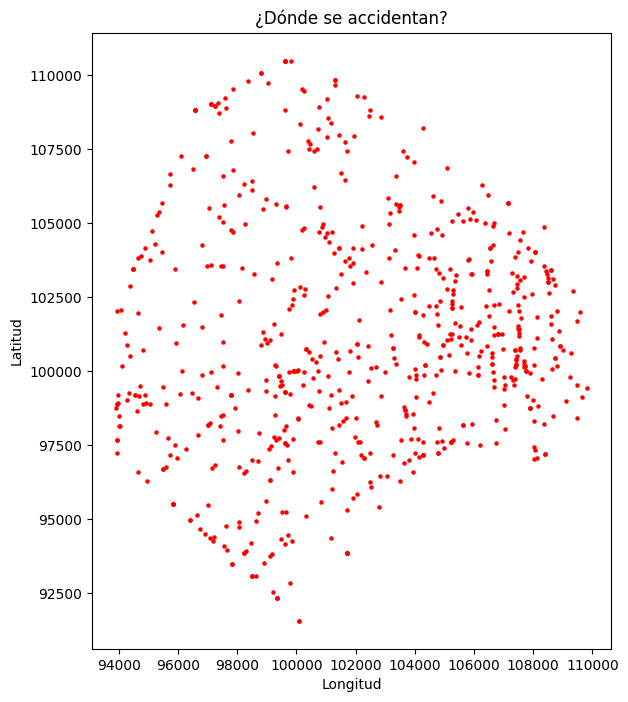

In [116]:
gdf.plot(marker='o', color='red', markersize=5, figsize=(8, 8))
plt.title('¿Dónde se accidentan?')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


SE EVIDENCIA COMO ARRIBA, QUE LOS SINIESTROS OCURREN MUY DISTRIBUIDOS A LO LARGO Y ANCHO DE CABA

ANALIZANDO EL EXCEL DE VICTIMAS

In [26]:
df_victimas = pd.read_excel('victimas.xlsx')
df_victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


CREANDO UNA COLUMNA CON LA DIFERENCIA ENTRE LA FECHA DE FALLECIMIENTO Y LA FECHA DE OCURRENCIA DEL HECHO PARA CONOCER CUANTOS SINIESTROS INGRESARON AL SERVICIO MEDICO DE LA CIUDAD Y AUN ASI PERDIERON LA VIDA

In [28]:
diferencias = []
for index, row in df_victimas.iterrows():
    try:
        
        fecha_fallecimiento = pd.to_datetime(row['FECHA_FALLECIMIENTO'])
        fecha = pd.to_datetime(row['FECHA'])      
        
        diferencia = (fecha_fallecimiento - fecha).days       
        
        diferencias.append(diferencia)
    except:
        
        diferencias.append('SD')


df_victimas['DIAS_AL_FALLECIMIENTO'] = diferencias


In [29]:
df_victimas.head(1)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_AL_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,0


GRAFICANDO DIAS AL FALLECIMIENTO

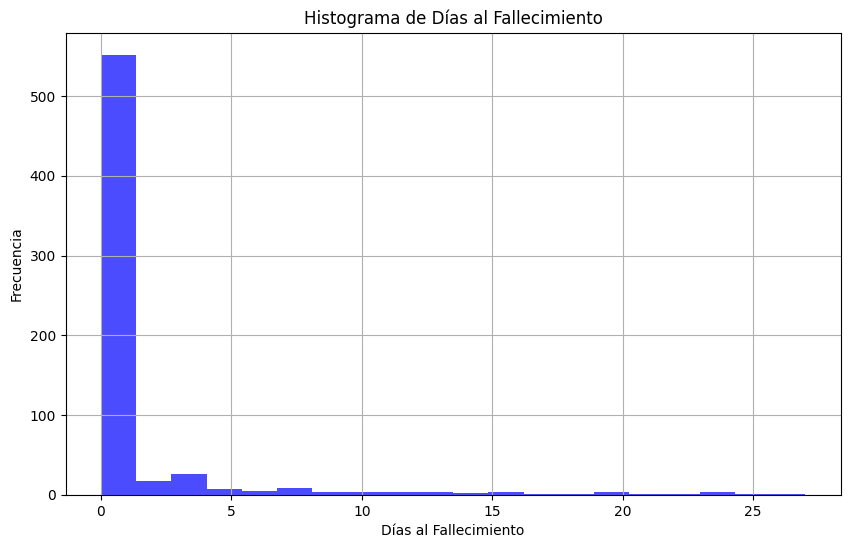

In [30]:
df_filtrado = df_victimas[df_victimas['DIAS_AL_FALLECIMIENTO'] != 'SD']
df_filtrado['DIAS_AL_FALLECIMIENTO'] = pd.to_numeric(df_filtrado['DIAS_AL_FALLECIMIENTO'])
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['DIAS_AL_FALLECIMIENTO'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Días al Fallecimiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Días al Fallecimiento')
plt.grid(True)
plt.show()

LA MAYORIA DE LAS VICTIMAS FALLECEN EL DIA DEL ACCIDENTE

¿QUIENES MUEREN MAS, CONDUCTOR O PASAJERO, HOMBRES O MUJERES?

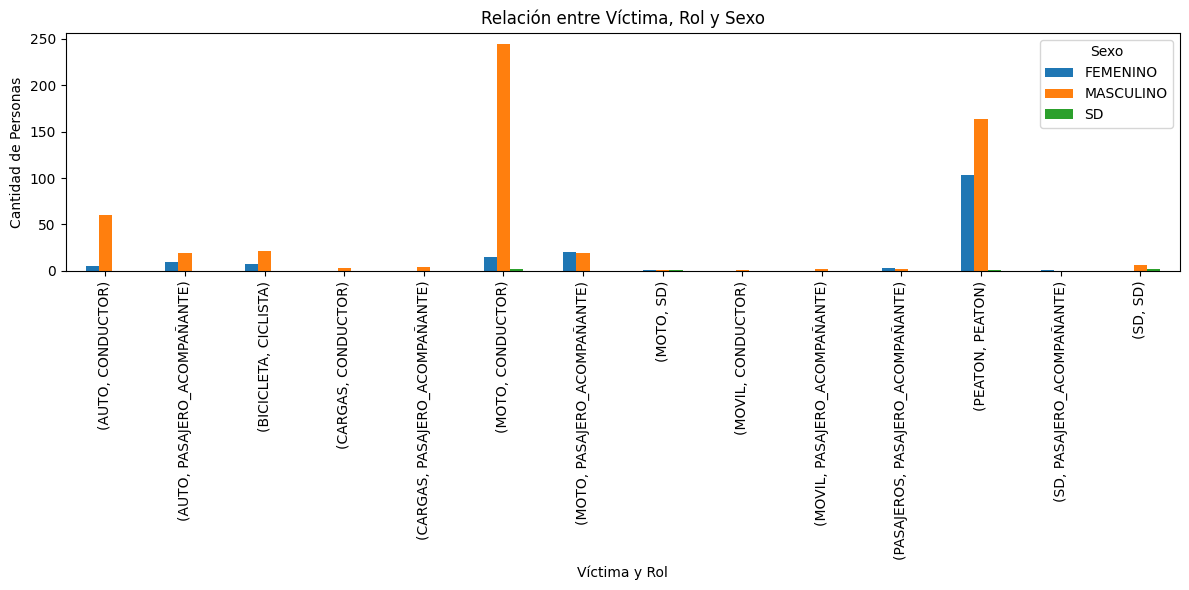

In [31]:
tabla_contingencia = pd.crosstab([df_victimas['VICTIMA'], df_victimas['ROL']], df_victimas['SEXO'])
tabla_contingencia.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Víctima y Rol')
plt.ylabel('Cantidad de Personas')
plt.title('Relación entre Víctima, Rol y Sexo')
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()


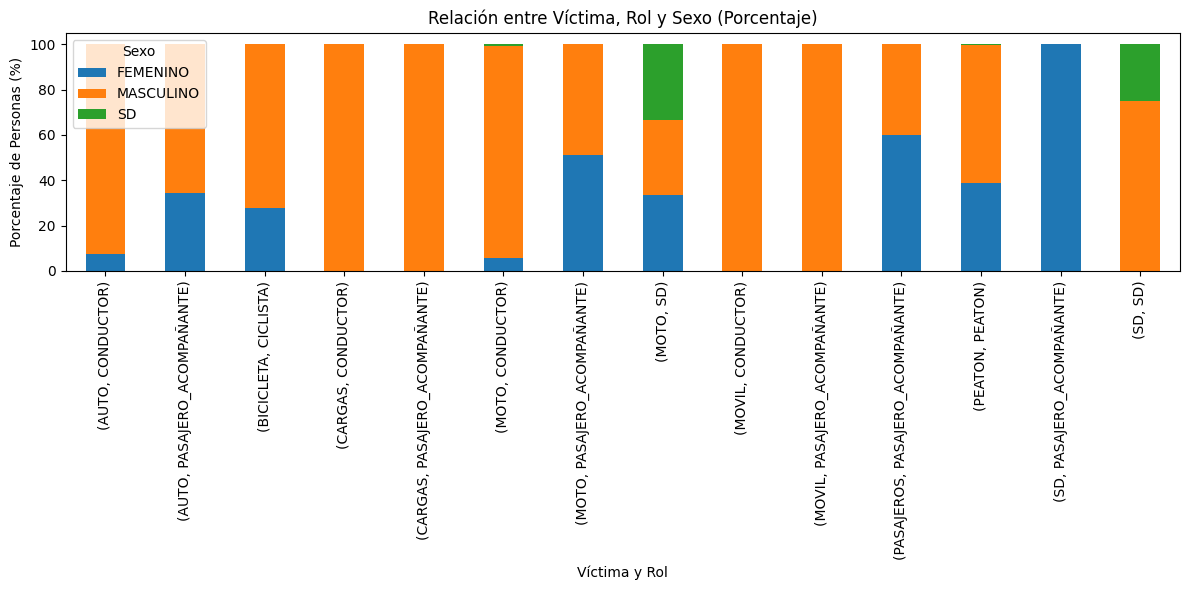

In [50]:
tabla_contingencia1 = pd.crosstab([df_victimas['VICTIMA'], df_victimas['ROL']], df_victimas['SEXO'])
tabla_contingencia1_porcentaje = tabla_contingencia1.div(tabla_contingencia1.sum(axis=1), axis=0) * 100
tabla_contingencia1_porcentaje.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Víctima y Rol')
plt.ylabel('Porcentaje de Personas (%)')
plt.title('Relación entre Víctima, Rol y Sexo (Porcentaje)')
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

¡HAY QUE PROTEGER AL MOTOCICLISTA!

¿DE QUE EDADES MUEREN?

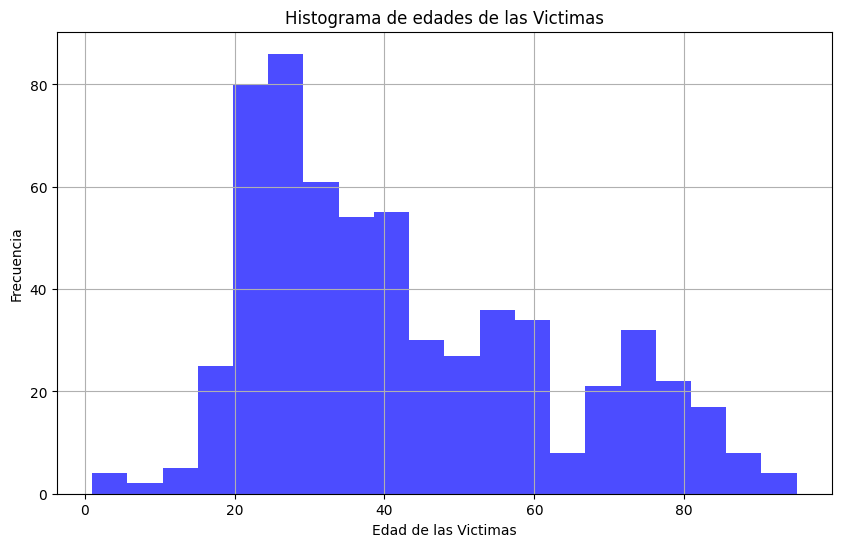

In [42]:
df_edad = df_victimas[df_victimas['EDAD'] != 'SD']
df_filtrado['EDAD'] = pd.to_numeric(df_filtrado['EDAD'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['EDAD'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Edad de las Victimas')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades de las Victimas')
plt.grid(True)
plt.show()

EL ROL Y LA EDAD DE LOS FALLECIDOS

In [32]:
df_victimas['EDAD'].replace('SD', -1, inplace=True)
df_victimas['EDAD_SEGMENTADA'] = pd.cut(df_victimas['EDAD'], bins=[0, 20, 40, 60, 80, 100], labels=['0-19', '20-39', '40-59', '60-79','80-100'])
df_victimas.head(1)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_AL_FALLECIMIENTO,EDAD_SEGMENTADA
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,0,0-19


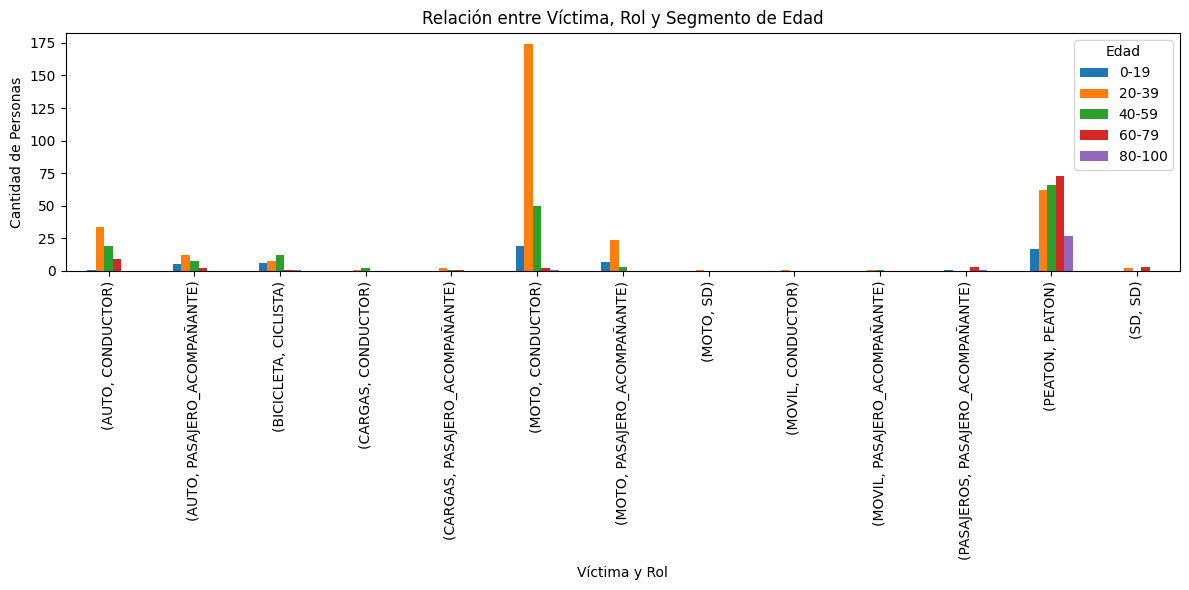

In [33]:
tabla_rol_edad = pd.crosstab([df_victimas['VICTIMA'], df_victimas['ROL']], df_victimas['EDAD_SEGMENTADA'])
tabla_rol_edad.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Víctima y Rol')
plt.ylabel('Cantidad de Personas')
plt.title('Relación entre Víctima, Rol y Segmento de Edad')
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

In [34]:
df_victimas['DIAS_AL_FALLECIMIENTO'].replace('SD', -100, inplace=True)
df_victimas['FALLECIMIENTO_SEGMENTADO'] = pd.cut(df_victimas['DIAS_AL_FALLECIMIENTO'], bins=[0, 2, 5, 8, 11, 14, 17, 21, 24], labels=['0-2 dias', '3-5 dias','6-8dias', '9-11 dias', '12-14 dias', '15-17 dias', '18-20 dias', 'mas de 20 dias'])

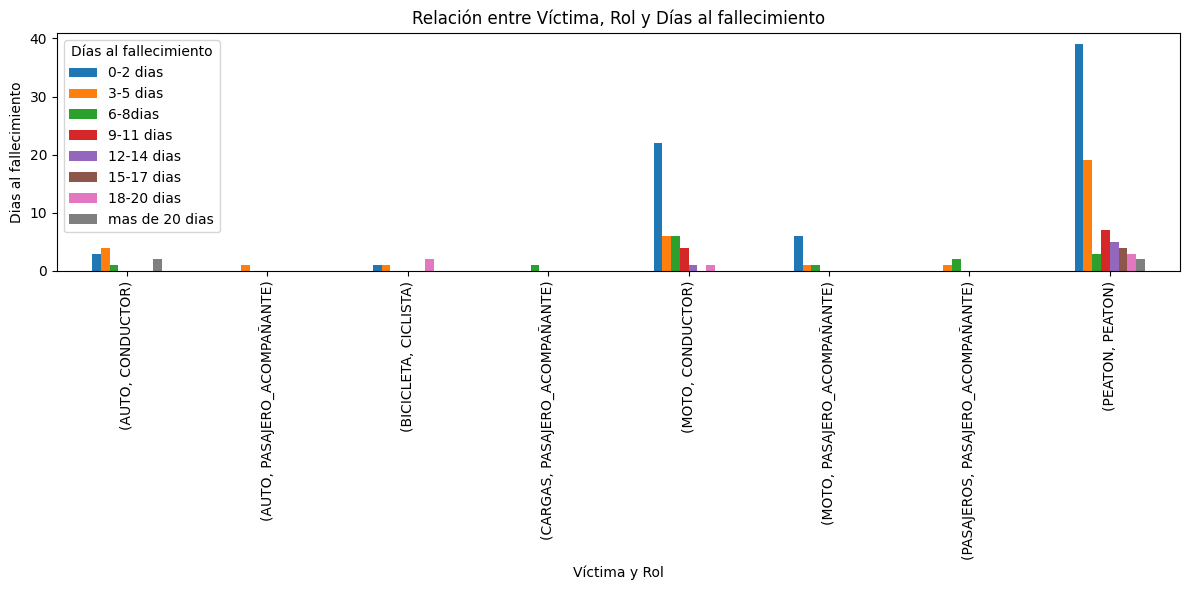

In [35]:
df_filtrado= df_victimas[df_victimas['FALLECIMIENTO_SEGMENTADO'] != 'SD']
tabla_contingencia = pd.crosstab([df_victimas['VICTIMA'], df_victimas['ROL']], df_victimas['FALLECIMIENTO_SEGMENTADO'])
tabla_contingencia.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Víctima y Rol')
plt.ylabel('Dias al fallecimiento')
plt.title('Relación entre Víctima, Rol y Días al fallecimiento')
plt.tight_layout()
plt.legend(title='Días al fallecimiento')
plt.show()

¡EL TREN HA COBRADO UNA SOLA VICITMA EN ESTE REPORTE!

In [36]:
df_victimas.to_csv('victimas.csv', index = False)
df_homicidios.to_csv('homicidios.csv', index = False)

In [2]:
df_victimas=pd.read_csv('victimas.csv')
df_homicidios=pd.read_csv('homicidios.csv')

¡CONSULTANDO EL SEGUNDO KPI!

In [4]:
df_victimas.rename(columns={'ID_hecho': 'ID'}, inplace=True)

In [6]:
df_power = df_homicidios.merge(df_victimas, on='ID')

DF_POWER

In [7]:
columnas_a_eliminar = ['FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'VICTIMA_x']
df_power = df_power.drop(columns=columnas_a_eliminar)

CONDUCTORES DE MOTO FALLECIDOS DISCRIMADOS POR SEXO

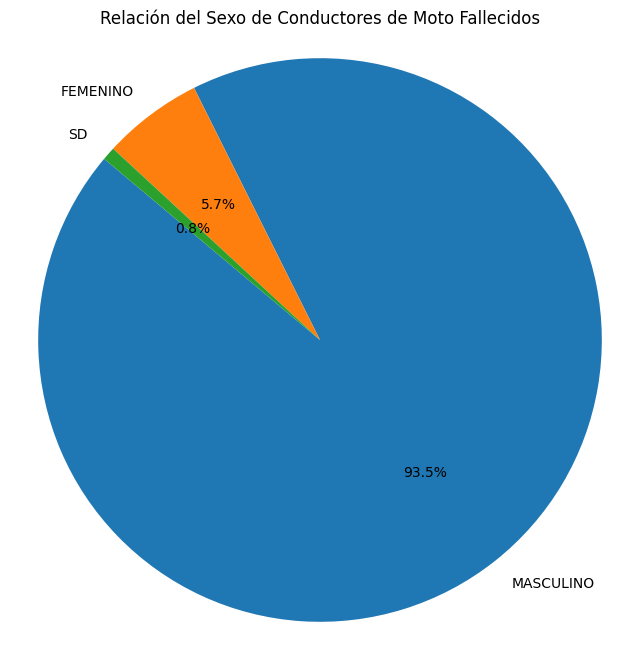

In [57]:
condiciones1 = (df_victimas['VICTIMA'] == 'MOTO') & (df_victimas['ROL'] == 'CONDUCTOR')
df_filtrado = df_victimas[condiciones1]
porcentaje_sexo = df_filtrado['SEXO'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_sexo, labels=porcentaje_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Relación del Sexo de Conductores de Moto Fallecidos')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.show()

ACOMPAÑANTES DE MOTO FALLECIDOS DISCRIMANDOS POR SEXO

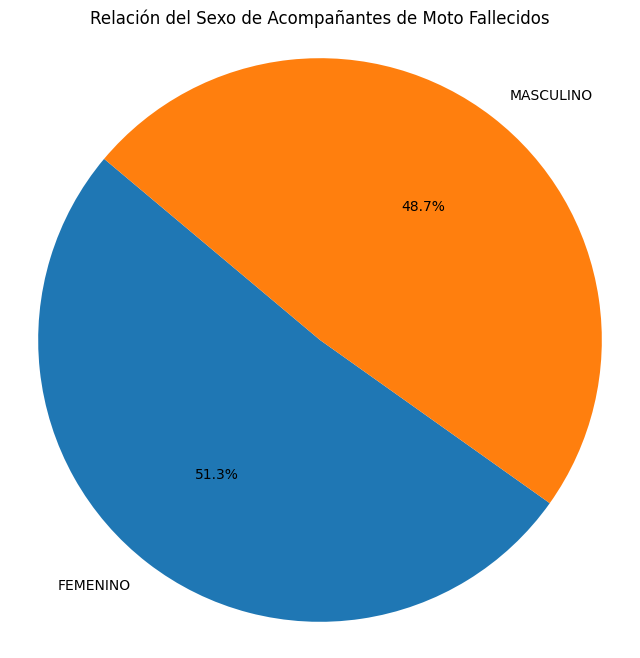

In [56]:
condiciones1 = (df_victimas['VICTIMA'] == 'MOTO') & (df_victimas['ROL'] == 'PASAJERO_ACOMPAÑANTE')
df_filtrado = df_victimas[condiciones1]
porcentaje_sexo = df_filtrado['SEXO'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_sexo, labels=porcentaje_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Relación del Sexo de Acompañantes de Moto Fallecidos')
plt.axis('equal')

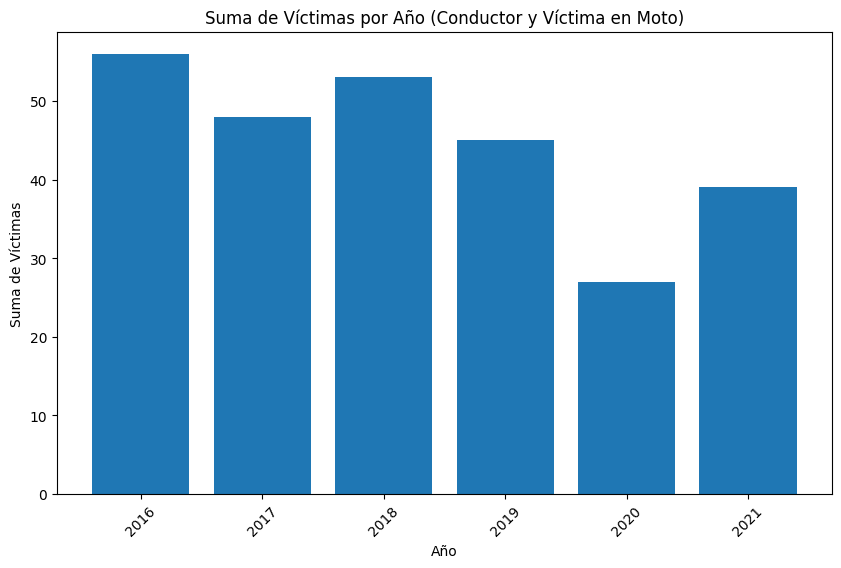

In [40]:
condiciones = (df_merged['ROL'] == 'CONDUCTOR') & (df_merged['VICTIMA_y'] == 'MOTO')
df_filtrado = df_merged[condiciones]
resumen_por_año = df_filtrado.groupby('AAAA_y')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(resumen_por_año['AAAA_y'], resumen_por_año['N_VICTIMAS'])
plt.title('Suma de Víctimas por Año (Conductor y Víctima en Moto)')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas')
plt.xticks(rotation=45)
plt.show()

In [46]:
resumen_por_año['Cambio_Porcentual'] = resumen_por_año['N_VICTIMAS'].pct_change()*100
resumen_por_año

,AAAA_y,N_VICTIMAS,Cambio_Porcentual
0,2016,56,NaN
1,2017,48,-14.285714
2,2018,53,10.416667
3,2019,45,-15.094340
4,2020,27,-40.000000
5,2021,39,44.444444


KPI 2:
REDUCIR EN UN 7% LA TASA DE ACCIDENTES MORTALES DE MOTOCICLISTAS EN EL ULTIMO AÑO RESPECTO AL AÑO ANTERIOR:


NO SE CUMPLE, LA TASA OBJETIVO ERA DE 33.48 Y SE OBTUVO -47.75% HUBO UN INCREMENTO EN EL NUMERO DE ACCIDENTES.

DEFINICION DE ESTE KPI EN EL README

ENCONTRANDO COINCIDENCIA DE MUERTE CUANDO HAY CRUCE DE CALLES

In [62]:
filtro_cruce_si = df_power[df_power['Cruce'] == 'SI']
total_victimas = filtro_cruce_si['N_VICTIMAS'].sum()
valores_rol = filtro_cruce_si['ROL'].unique()
print('Valores de la columna ROL:')
for rol in valores_rol:
    print(rol)
print(f'Total de víctimas con Cruce "SI": {total_victimas}')

Valores de la columna ROL:
CONDUCTOR
PASAJERO_ACOMPAÑANTE
PEATON
SD
CICLISTA
Total de víctimas con Cruce "SI": 572


In [68]:
filtro_cruce_si1 = df_power[df_power['Cruce'] == 'SI']
muertes_por_rol = filtro_cruce_si1[filtro_cruce_si1['N_VICTIMAS'] > 0].groupby('ROL')['N_VICTIMAS'].count()
print(muertes_por_rol)

ROL
CICLISTA                 18
CONDUCTOR               247
PASAJERO_ACOMPAÑANTE     63
PEATON                  208
SD                        4
Name: N_VICTIMAS, dtype: int64


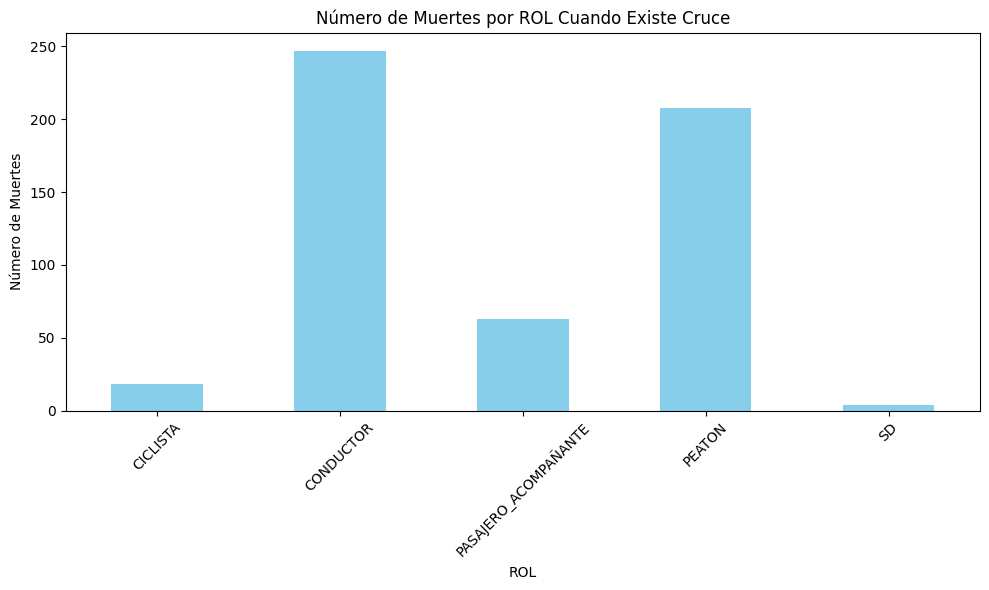

In [69]:
plt.figure(figsize=(10, 6))
muertes_por_rol.plot(kind='bar', color='skyblue')
plt.xlabel('ROL')
plt.ylabel('Número de Muertes')
plt.title('Número de Muertes por ROL Cuando Existe Cruce')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KPI 3:
(PROPUESTO) DISMINUCION DEL 5% DE MUERTES DE PEATON RESPECTO DEL AÑO ANTERIOR. DEFINIENDOLO COMO (ACCIDENTES MORTALES DE PEATONES EN EL AÑO ANTERIOR - ACCIDENTES MORTALES AÑO ACTUAL) / (ACCIDENTES MORTALES DE PEATONES EN EL AÑO ANTERIOR) * 100

In [17]:
filtro_peaton = df_power[df_power['ROL'] == 'PEATON']
resumen_siniestros = filtro_peaton.groupby(['AAAA_y', 'Semestre'])['N_VICTIMAS'].sum().reset_index()
print(resumen_siniestros)

    AAAA_y  Semestre  N_VICTIMAS
0     2016         1          26
1     2016         2          22
2     2017         1          19
3     2017         2          30
4     2018         1          37
5     2018         2          31
6     2019         1          20
7     2019         2          17
8     2020         1          16
9     2020         2          20
10    2021         1          18
11    2021         2          15


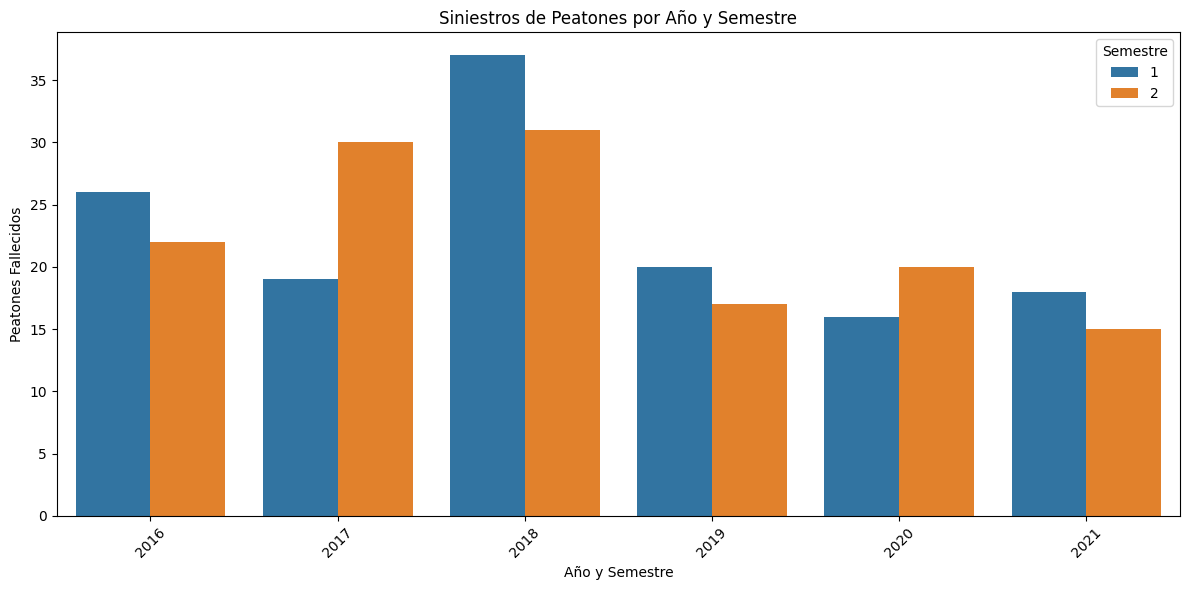

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=resumen_siniestros, x='AAAA_y', y='N_VICTIMAS', hue='Semestre')
plt.title('Siniestros de Peatones por Año y Semestre')
plt.xlabel('Año y Semestre')
plt.ylabel('Peatones Fallecidos')
plt.xticks(rotation=45)
plt.legend(title='Semestre')
plt.tight_layout()
plt.show()

In [18]:
resumen_siniestros['Cambio_Porcentual'] = resumen_siniestros['N_VICTIMAS'].pct_change()*100
resumen_siniestros

,AAAA_y,Semestre,N_VICTIMAS,Cambio_Porcentual
0,2016,1,26,NaN
1,2016,2,22,-15.384615
2,2017,1,19,-13.636364
3,2017,2,30,57.894737
4,2018,1,37,23.333333
5,2018,2,31,-16.216216
6,2019,1,20,-35.483871
7,2019,2,17,-15.000000
8,2020,1,16,-5.882353
9,2020,2,20,25.000000


EL SEGUNDO SEMESTRE DEL AÑO 2016, EL PRIMERO DEL 2017, EL SEGUNDO DEL 2018, EL PRIMERO Y SEGUNDO DE 2019, EL PRIMERO DEL 2020 Y EL PRIMERO Y SEGUNDO DE 2021 DISMINUYO EL NUMERO DE ACCIDENTES

In [8]:
df_power.to_csv('power.csv', index = False)

In [3]:
df_homicidios=pd.read_csv('homicidios.csv')
df_victimas=pd.read_csv('victimas.csv')

In [4]:
df_homicidios.to_csv('homicidios.csv', index=False)
df_victimas.to_csv('victimas.csv', index=False)

In [12]:
df_filtered8 = df_power[df_power['VICTIMA_y'] == 'PEATON']
result = df_filtered8.groupby('COMUNA')['N_VICTIMAS'].sum()
print(result)

COMUNA
1     47
2     14
3     17
4     30
5     12
6      8
7     22
8     18
9     25
10     7
11     9
12     7
13    17
14    18
15    20
Name: N_VICTIMAS, dtype: int64


FALLECIMIENTOS DE PEATONES POR COMUNA

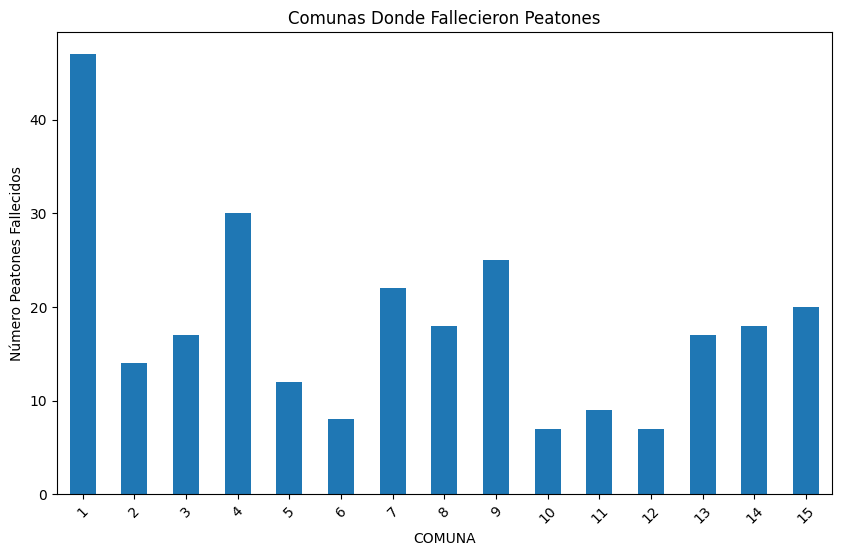

In [15]:
df_filtered = df_power[df_power['VICTIMA_y'] == 'PEATON']
result = df_filtered.groupby('COMUNA')['N_VICTIMAS'].sum()
result.plot(kind='bar', figsize=(10, 6))
plt.title('Comunas Donde Fallecieron Peatones')
plt.xlabel('COMUNA')
plt.ylabel('Número Peatones Fallecidos')
plt.xticks(rotation=45)
plt.show()

COMO ES DE ESPERARSE LA COMUNA 1 ES LA MAS PELIGROSA EN TODOS LOS SENTIDOS

¿A QUE HORAS HAY MAS SINIESTROS DE PEATONES EN LA COMUNA 1?

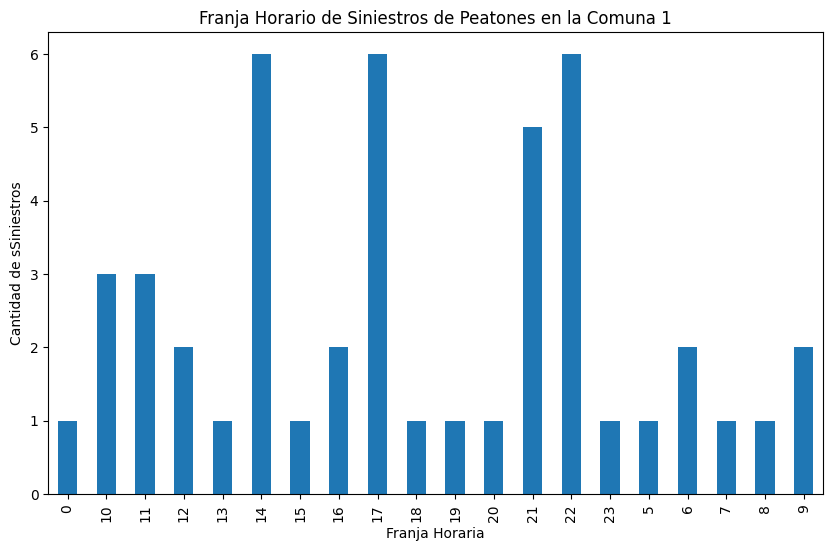

In [21]:
df_filtered = df_power[(df_power['COMUNA'] == 1) & (df_power['VICTIMA_y'] == 'PEATON')]
result = df_filtered.groupby('HH')['N_VICTIMAS'].sum()
result.plot(kind='bar', figsize=(10, 6))
plt.title('Franja Horario de Siniestros de Peatones en la Comuna 1')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de sSiniestros')
plt.show()

LAS 14, 17, 21 Y 22 HORAS SON LAS MAS PELIGROSAS PARA LOS PEATONES EN LA COMUNA 1

EL KPI PROPUESTO, REDUCIR EN 5% LA TASA DE ACCIDENTES FATALES PARA PEATONES RESPECTO DEL AÑO ANTERIOR NO SE CUMPLE